In [1]:
import sys, os
sys.path.insert(0, os.path.abspath('../'))
import utils.osm_helper
reload(utils.osm_helper)
from utils.osm_helper import *
import geopandas as gp
%matplotlib inline
from osmread import parse_file, Node, Way, Relation

In [2]:
DCOSM_DATA_PATH = '../data/washingtonDC.osm'
OUTPUT_DIR = '../data/output/'

In [3]:
OSM_DATA = osm_container(DCOSM_DATA_PATH)
print OSM_DATA.data_size()

begin reading osm 2016-11-08 16:09:03.079000
finish reading osm 2016-11-08 16:10:14.731000
["len of <class 'osmread.elements.Relation'> = 3427", "len of <class 'osmread.elements.Node'> = 2546260", "len of <class 'osmread.elements.Way'> = 306332"]


In [96]:
def get_area_ways(osm_data):
    polys = []
    for way in osm_data.osm_objs[Way]:
        ln = way2line(osm_data, way)
        if ln.is_ring and len(ln.coords)>=3:
            poly=shpgeo.Polygon(ln)
            polys.append((way.id,poly))
    gpdf = gp.GeoDataFrame(polys, columns=['wayid', 'geometry'])
    gpdf.crs = {'init':'epsg:4326'}
    gpdf = gpdf.to_crs(epsg=3559)
    gpdf['area'] = gpdf.geometry.apply(lambda x:x.area)
    return gpdf

gpdf_area = get_area_ways(OSM_DATA)
gpdf_area.shape

(236256, 3)

In [103]:
gpdf_area[gpdf_area.wayid==440070008]

,wayid,geometry,area
234411,440070008,"POLYGON ((397703.9664811385 128994.4518940037,...",2478560.520169


In [102]:
gpdf_area.sort('area',ascending=False)

,wayid,geometry,area
234467,440165276,"POLYGON ((397839.6066623423 129512.2712607725,...",11475921.495604
124298,221896965,"POLYGON ((395984.9200541574 122403.3771531997,...",6086803.168194
109140,116893146,"POLYGON ((384598.9684163657 150541.3917227949,...",5000654.553680
100466,91278574,"POLYGON ((409565.5745513114 146728.5611949514,...",4776472.717058
111249,137952788,"POLYGON ((391255.1800687139 138418.698342034, ...",4282808.636221
123657,220515922,"POLYGON ((392138.0621015504 145815.2265632857,...",4241646.897114
134801,243497073,"POLYGON ((408271.4277737296 146429.084568467, ...",3339311.419129
124297,221896964,"POLYGON ((396006.1943844497 120608.7722200295,...",3150745.397155
25191,56001530,"POLYGON ((396284.3207673127 132842.9149177316,...",2924501.851116
109014,111781641,"POLYGON ((393036.3260476024 150921.3911488999,...",2718318.282386


In [176]:
def get_rltn_area(osm_data):
    result = []
    for r in osm_data.osm_objs[Relation]:
        merge_shpcltn, status = rltn2mergedCltn(osm_data, r)
        if status!='error':
            for a in merge_shpcltn.geometry.values:
                result.append((r.id,a))
            
    return result
# get_rltn_area(OSM_DATA)
all_merge_shp = get_rltn_area(OSM_DATA)

50372 relation's member out of osm bound, no need to consider 113295049L
62152 relation's member out of osm bound, no need to consider 215634L
112245 relation's member out of osm bound, no need to consider 2297232L
133366 relation's member out of osm bound, no need to consider 34313742L
133386 relation's member out of osm bound, no need to consider 34314601L
133393 relation's member out of osm bound, no need to consider 34314461L
133482 relation's member out of osm bound, no need to consider 34317348L
133492 relation's member out of osm bound, no need to consider 34317467L
133501 relation's member out of osm bound, no need to consider 34317475L
133513 relation's member out of osm bound, no need to consider 34303757L
133514 relation's member out of osm bound, no need to consider 34314019L
133518 relation's member out of osm bound, no need to consider 404669425L
133524 relation's member out of osm bound, no need to consider 34317735L
133564 relation's member out of osm bound, no need to 

In [177]:
gpdf_rltn = gp.GeoDataFrame(all_merge_shp, columns=['rid','geometry'])
gpdf_rltn.crs = {'init':'epsg:4326'}
gpdf_rltn = gpdf_rltn.to_crs(epsg=3559)

In [178]:
gpdf_rltn['area']=gpdf_rltn.geometry.apply(lambda x: x.area)

In [180]:
merge_shpcltn, status = rltn2mergedCltn(OSM_DATA,OSM_DATA.get_osm_relation_by_id(4644977))
for a in merge_shpcltn.values:
    print a
print merge_shpcltn.geometry.values

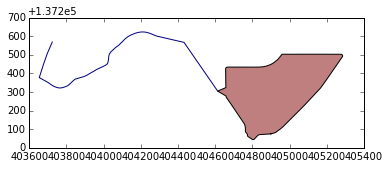

In [182]:
gpdf_rltn[gpdf_rltn.rid==4644977].plot()

In [183]:
gpdf_rltn_area = gpdf_rltn.groupby('rid').agg(sum).sort('area',ascending=False)

In [185]:
tags_to_exclude = set(['waterway', 'admin_level', 'boundary', 'place'])
rs = []
for r in OSM_DATA.osm_objs[Relation]:
    if len(set(r.tags.keys())&tags_to_exclude)>0:
        rs.append(r)
rids = [(r.id, r.tags.get('waterway',''),r.tags.get('admin_level',''),r.tags.get('boundary',''),r.tags.get('place',''),) for r in rs]


In [186]:
gpdf_rltn_area.reset_index().merge(pd.DataFrame(rids,columns=['rid','waterway', 'admin_level', 'boundary','place']))

,rid,area,waterway,admin_level,boundary,place
0,5396194,1.771371e+08,,8,administrative,
1,162069,1.771371e+08,,4,administrative,
2,206845,6.736753e+07,,8,administrative,locality
3,962190,6.736753e+07,,6,administrative,
4,962189,4.086565e+07,,6,administrative,
5,206637,4.010932e+07,,8,administrative,city
6,133559,2.363126e+07,,8,administrative,locality
7,133515,1.907209e+07,,8,administrative,locality
8,133557,1.446115e+07,,8,administrative,locality
9,206733,1.192815e+07,,8,administrative,locality


In [242]:

def filter_obj(obj, tag, value='*'):
    if not tag in obj.tags:
        return False
    if value=='*':
        return True
    return obj.tags[tag]==value

def filters(obj, have_one, donthave):
    for tag, value in donthave:
        if filter_obj(obj,tag, value):
            return False
    
    b_have_one = False
    for tag, value in have_one:
        b_have_one = b_have_one or filter_obj(obj, tag,value)
    return b_have_one

In [246]:
#  ('route','*') should be interseting, especially route=bicycle
#  ('waterway','*') should be interesting, but need to keep track in the stage of merging node, ways and relations
have_one = [('boundary','*'),
            ('place','*'), 
            ('landuse', '*')
           ]
donthave = [('leisure','*'), ('amenity','*'), ('boundary','national_park'), ('boundary', 'protected_area' )]
attr =[x[0] for x in have_one]

def filter_osm_data(osm_data,osmtype,have_one, donthave,attr):
    objs = []
    for o in osm_data.osm_objs[osmtype]:
        if filters(o, have_one, donthave):
            objs.append(o)
    objs = [[o.id]+[o.tags.get(k,'') for k in attr] for o in objs]
    return objs
rids = filter_osm_data(OSM_DATA,Relation,have_one, donthave,attr)
df = gpdf_rltn_area.reset_index().merge(pd.DataFrame(rids,columns=['rid']+attr))
df

,rid,area,boundary,place,landuse
0,5396194,1.771371e+08,administrative,,
1,162069,1.771371e+08,administrative,,
2,206845,6.736753e+07,administrative,locality,
3,962190,6.736753e+07,administrative,,
4,962189,4.086565e+07,administrative,,
5,206637,4.010932e+07,administrative,city,
6,133559,2.363126e+07,administrative,locality,
7,133515,1.907209e+07,administrative,locality,
8,133557,1.446115e+07,administrative,locality,
9,206733,1.192815e+07,administrative,locality,


In [247]:
print have_one, donthave
ways = filter_osm_data(OSM_DATA,Way,have_one, donthave,attr)
df2 = gpdf_area.reset_index().merge(pd.DataFrame(ways,columns=['wayid']+attr))
df2

[('boundary', '*'), ('place', '*'), ('landuse', '*')] [('leisure', '*'), ('amenity', '*'), ('boundary', 'national_park'), ('boundary', 'protected_area')]


,index,wayid,geometry,area,boundary,place,landuse
0,325,21692787,"POLYGON ((396027.479465716 122531.1233227227, ...",12413.752029,,island,
1,326,21693235,"POLYGON ((396010.7667058067 122683.4093965452,...",40706.591935,,island,
2,327,21694219,"POLYGON ((385319.0498135864 144719.2083280867,...",8944.567758,,island,
3,328,21694421,"POLYGON ((388526.6368517831 143165.6459854018,...",19901.898183,,island,
4,329,21694848,"POLYGON ((387267.6768946547 144486.0532801318,...",4788.112175,,island,
5,576,24942401,"POLYGON ((403835.1347485789 146374.202893728, ...",39400.094792,,,residential
6,785,27308469,"POLYGON ((394845.6461636972 125912.0576510821,...",136464.764601,,,cemetery
7,800,27309879,"POLYGON ((392440.2493420034 126739.5289357582,...",44434.652498,,,retail
8,804,27311168,"POLYGON ((390181.2846102583 127128.0072587237,...",45269.587331,,,retail
9,831,28295063,"POLYGON ((389096.9594195494 141402.5919210345,...",8302.074457,,,grass


In [248]:
filters(OSM_DATA.get_osm_way_by_id(51858784), have_one, donthave)

False